<a href="https://colab.research.google.com/github/shila121/projects/blob/main/Banking_Project_Term_Deposit_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Framing the Problem Statement
Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

# 2.Data Analysis
we will try to understand the data by following ways
1.   hypothesis testing
2.   univariate/bivariate analysis
3.   missing data
4.   numerical data
5.  outliers
6.   categorical data







# Step 1:Hypothesis testing

In [2]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset
data = pd.read_csv('preprocessed_data.csv')
data.head()
print('data visualization')
print(data.head())
print(data.columns,len(data.columns))
print(data.shape)
print('*'*80)

# get the categorical columns from the data
catCols = data.select_dtypes('object').columns
print('categorical columns',catCols,len(catCols))
print('*'*80)

# get numerical columns from the data
numCols = data.select_dtypes('number').columns
print('numeric columns',numCols,len(numCols))
print('*'*80)

print(data['y'].unique())



data visualization
   age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   55    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   55    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  y  
0            4       227         4         1  0  
1            4       202         2         0  0  
2            1       550         1         1  1  
3            1       120         2         1  0  
4            3       368         2         1  0  
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object') 14
(32950, 14)
***************************

In [4]:
# we will carry out z-test on the numerical columns to know their impact
from statsmodels.stats import weightstats as stests

significant_numCols,in_significant_numCols = [],[]

for i in numCols:
  p_val = stests.ztest(data[i],data.y)
  p_val = p_val[1]
  print('column:',i,'p_val:',p_val)
  if p_val < 0.05:
    status = "Reject Null Hypothesis,Significant predictor"
    print('status',status)
    print('*'*80)
    significant_numCols.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictor'
    print('status',status)
    in_significant_numCols.append(i)
    print('*'*80)

print('significant numeric columns:',significant_numCols,len(significant_numCols))
print('in_significant numeric columns:',in_significant_numCols,len(in_significant_numCols))

column: age p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: job p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: marital p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: education p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: default p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: housing p_val: 0.0
status Reject Null Hypothesis,Significant predictor
********************************************************************************
column: loan p_val: 1.9844917572709503e-51
sta

# Step 2:Univariate/Bivariate analysis

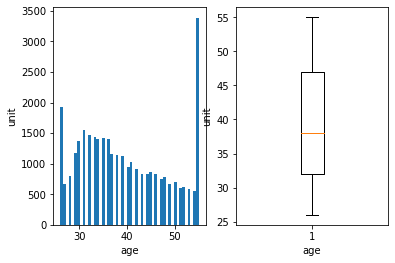

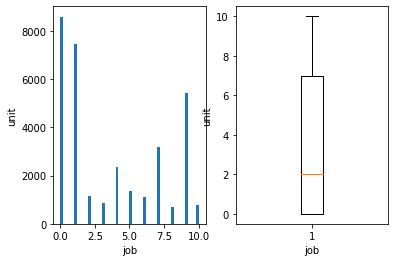

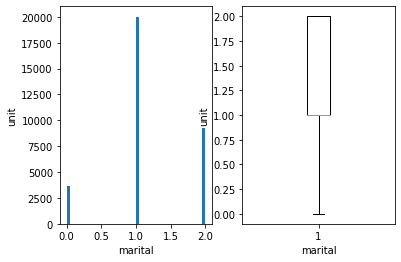

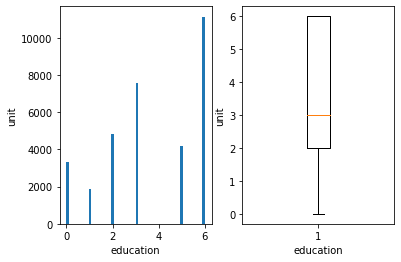

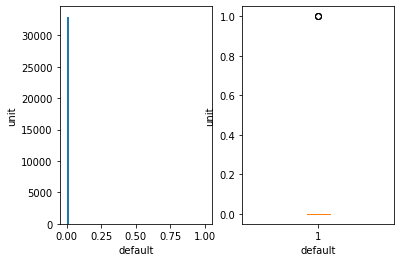

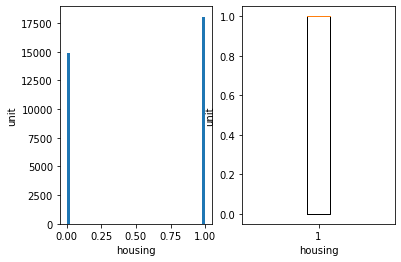

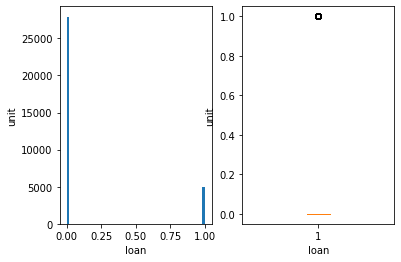

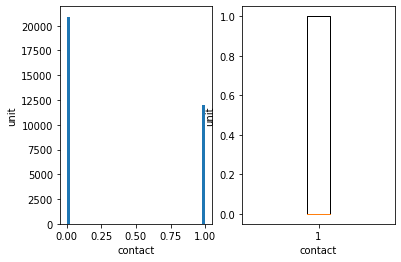

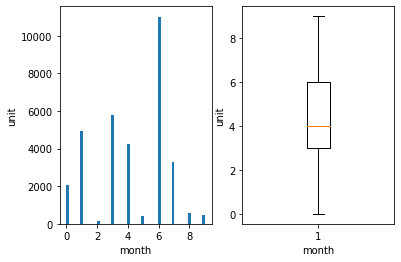

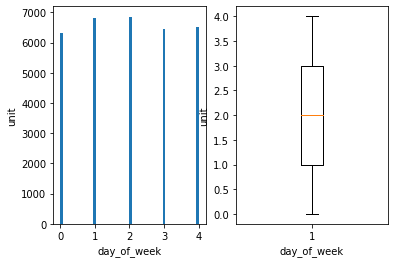

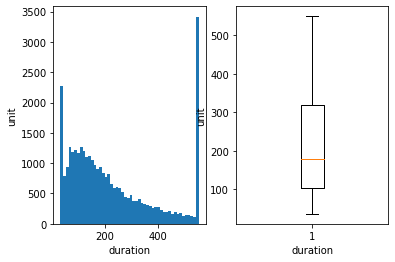

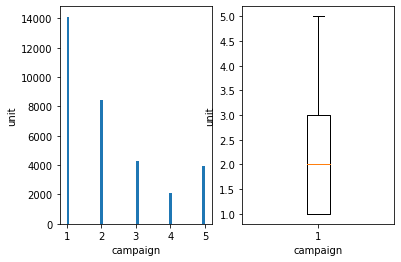

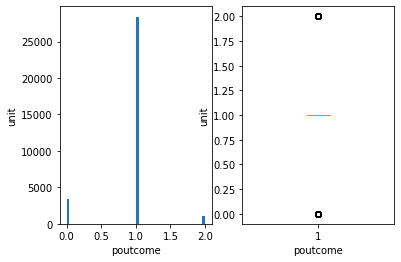

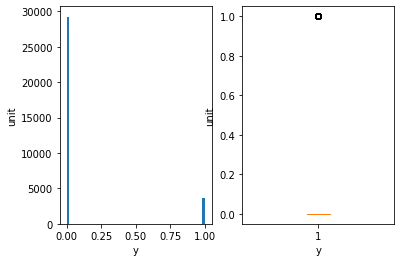

In [5]:
# univariate analysis of numeric columns with histogram and boxplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins =50)
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.show()

                  age       job   marital  education   default   housing  \
age          1.000000 -0.021699 -0.405322  -0.121362  0.002867 -0.003995   
job         -0.021699  1.000000  0.028103   0.131251  0.015322  0.009210   
marital     -0.405322  0.028103  1.000000   0.111112 -0.002680  0.017711   
education   -0.121362  0.131251  0.111112   1.000000  0.002874  0.022380   
default      0.002867  0.015322 -0.002680   0.002874  1.000000 -0.004112   
housing     -0.003995  0.009210  0.017711   0.022380 -0.004112  1.000000   
loan        -0.003012 -0.013945  0.007988   0.010166 -0.004047  0.037050   
contact      0.024952 -0.031371 -0.054023  -0.109040 -0.007242 -0.078204   
month       -0.033614 -0.027566 -0.005747  -0.085088 -0.005074 -0.016748   
day_of_week -0.022997 -0.002116  0.002693  -0.016576  0.006811  0.003664   
duration    -0.000494 -0.005580  0.006257  -0.022133 -0.007481 -0.011294   
campaign     0.007063 -0.008350 -0.005635  -0.000067 -0.005995 -0.011987   
poutcome    

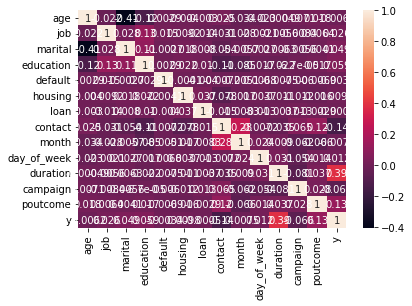

In [6]:
# Bi-variate analysis of numeric data by Co-relation matrix
import seaborn as sns
matrix = data.corr()
print(matrix)

sns.heatmap(matrix,annot = True)

# Step 3:Missing Value

In [7]:
# lets analyse if there is any missing values
print(data.isnull().sum())

# no missing value

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
y              0
dtype: int64


# Step 4:Numerical data analysis

In [8]:
print('numerical columns:',numCols,len(numCols))

# ->1. visualize numerical data
print(data[numCols].head())
print('*'*80)

# ->2. make a list of discrete numerical columns
discrete_numCols = [var for var in numCols if len(data[var].unique())<20]
print('dicrete numerical columns:',discrete_numCols,len(discrete_numCols))
print('*'*80)

# ->3.make a list of discrete numerical columns
continuous_numCols = [var for var in numCols if len(data[var].unique())>20]
print('continuous numerical columns:',continuous_numCols,len(continuous_numCols))
print('*'*80)

# ->4.visualize the continuous numerical columns
print(data[continuous_numCols].head())
print('*'*80)

numerical columns: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object') 14
   age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   55    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   55    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  y  
0            4       227         4         1  0  
1            4       202         2         0  0  
2            1       550         1         1  1  
3            1       120         2         1  0  
4            3       368         2         1  0  
***************************************

In [9]:
# univariate analysis of numerical descrete columns with value counts

for i in discrete_numCols:
  print('column:',i)
  print(data[i].value_counts())
  print('*'*80)

column: job
0     8579
1     7441
9     5400
7     3196
4     2345
5     1366
2     1160
6     1099
3      855
10     798
8      711
Name: job, dtype: int64
********************************************************************************
column: marital
1    20018
2     9257
0     3675
Name: marital, dtype: int64
********************************************************************************
column: education
6    11133
3     7596
2     4826
5     4192
0     3322
1     1865
4       16
Name: education, dtype: int64
********************************************************************************
column: default
0    32947
1        3
Name: default, dtype: int64
********************************************************************************
column: housing
1    18050
0    14900
Name: housing, dtype: int64
********************************************************************************
column: loan
0    27927
1     5023
Name: loan, dtype: int64
********************************************

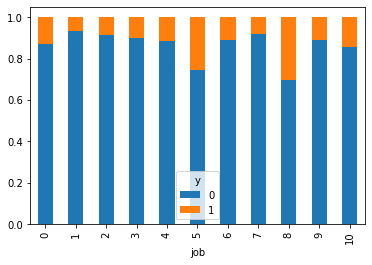

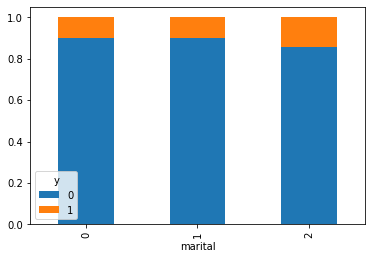

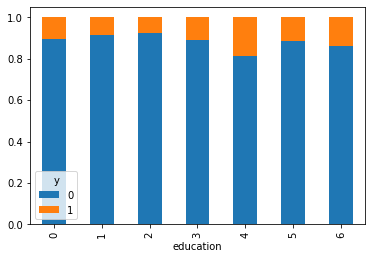

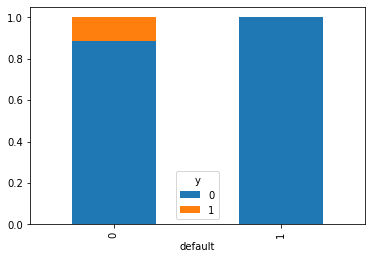

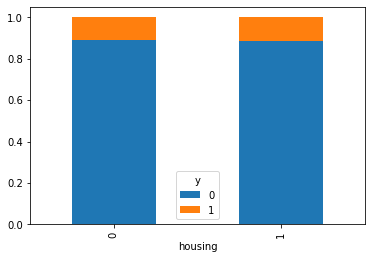

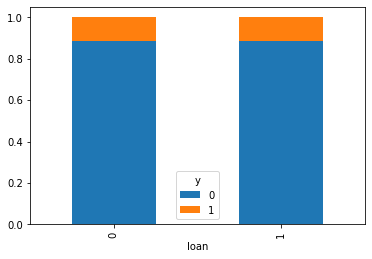

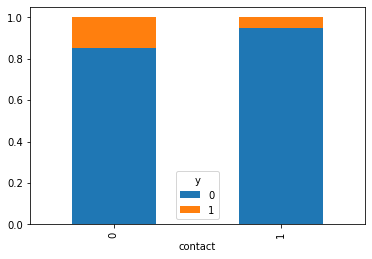

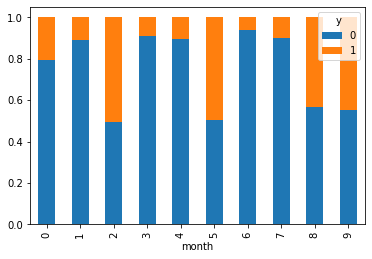

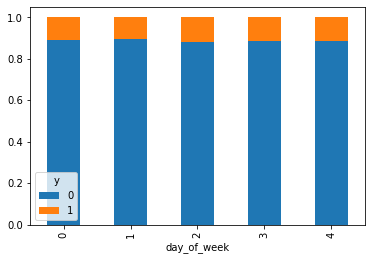

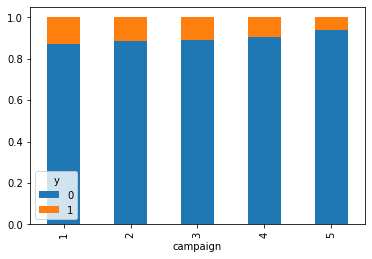

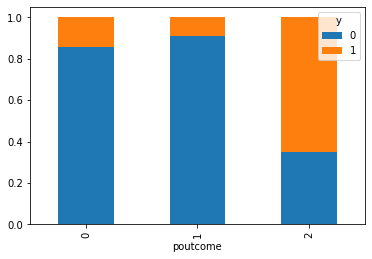

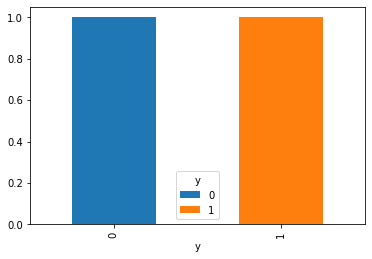

In [10]:
# Bi-variate analysis of numerical descrete columns 

for i in discrete_numCols:
  category = pd.crosstab(data[i],data['y'])
  category.div(category.sum(1).astype(float),axis =0 ).plot(kind = 'bar',stacked = True)
  plt.show()

# Step 5.Outliers Analysis

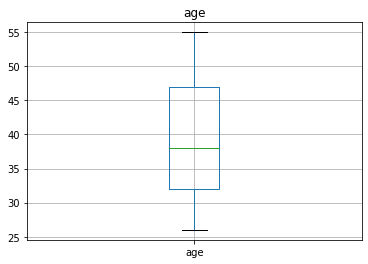

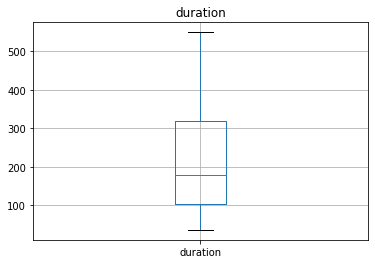

In [11]:
def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.show()


for i in continuous_numCols:
  find_outliers(data,i)

# 3.Feature Engineering
Here,we will deal with all the problems like



1.   train_test split
2.   missing value treatment
3.   outlier treatment
4.   rare category treatment
5.   caterical data encoding
6.   feature scaling
7.   feature selection















In [13]:
#  ->1. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['y'],random_state =0,test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(26360, 14) (6590, 14) (26360,) (6590,)


In [14]:
# ->2. missing value treatmnet

# get the categorical columns with na values
# no missing data so skipping this step

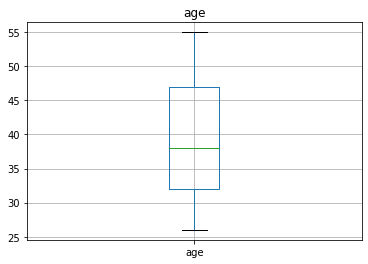

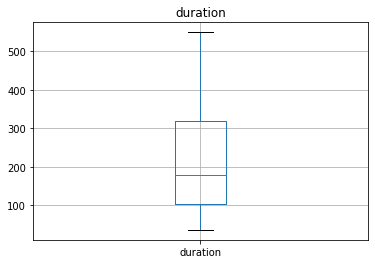

In [15]:
# -> 3. handling outliers


for var in continuous_numCols:
  find_outliers(data,var)

In [16]:
# ->handling rare labels

print('categorical columns:',catCols,len(catCols))

categorical columns: Index([], dtype='object') 0


In [18]:
# ->7 Feature scaling
train_vars = [var for var in X_train.columns if var not in ['y']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'] 13


In [19]:
# ->7. feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())

y_train = X_train['y']
y_test = X_test['y']

# drop unnecessary variables from our training and testing sets
X_train.drop(['y'], axis=1, inplace=True)
X_test.drop(['y'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

            age       job  marital  education  default  housing  loan  \
26529  0.200000 -0.142857      0.0      -0.75      0.0      0.0   0.0   
28227 -0.600000 -0.285714      1.0       0.75      0.0     -1.0   0.0   
27170 -0.333333 -0.285714      0.0       0.75      0.0     -1.0   0.0   
5460  -0.733333  1.142857      1.0       0.00      0.0     -1.0   0.0   
3069   0.866667 -0.285714      0.0       0.75      0.0      0.0   0.0   

       contact     month  day_of_week  duration  campaign  poutcome    y  
26529      0.0 -1.333333         -1.0  0.824885      -0.5       0.0  0.0  
28227      0.0 -1.000000          0.0 -0.313364      -0.5       0.0  0.0  
27170      0.0 -1.000000         -1.0  0.110599      -0.5       0.0  0.0  
5460       0.0 -1.000000          1.0 -0.400922      -0.5       1.0  0.0  
3069       0.0 -1.000000          0.5  1.506912       0.0       0.0  0.0  


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [20]:
sel_.get_support()

array([False, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True])

In [21]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 13
selected features: 7
features with coefficients shrank to zero: 6


In [22]:
# print the selected features
selected_feats

Index(['marital', 'education', 'contact', 'month', 'duration', 'campaign',
       'poutcome'],
      dtype='object')

# Checking model ...

In [23]:
# we will evaluate different machine learning classification models 
from sklearn.model_selection import cross_val_score


def cross_val(X_train,X_test,model):
  accuracies = cross_val_score(estimator = model,X=X_train,y=y_train,cv=5)
  return accuracies.mean()


def fit_and_evaluate(model):

  # train the model
  model.fit(X_train,y_train)

  model_pred = model.predict(X_test)
  model_cross = cross_val(X_train,y_train,model)
  return model_cross

# Evaluating various models
# ----------------------------------------

from sklearn import model_selection
from numpy import abs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models = []
names = []
score = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(("xg booster",XGBClassifier()))

for name,model in models:
  logr_cross = fit_and_evaluate(model)
  print("Name:",name,',Cross Validation Score = %0.4f' % logr_cross)
  score.append(logr_cross)

Name: Logistic Regression ,Cross Validation Score = 0.8895
Name: Linear svc ,Cross Validation Score = 0.8917
Name: Random forest classifier ,Cross Validation Score = 0.9002
Name: knn ,Cross Validation Score = 0.8885
Name: Guassian NB  ,Cross Validation Score = 0.1998
Name: Decision TreeClassifier ,Cross Validation Score = 0.8706
Name: xg booster ,Cross Validation Score = 0.9023


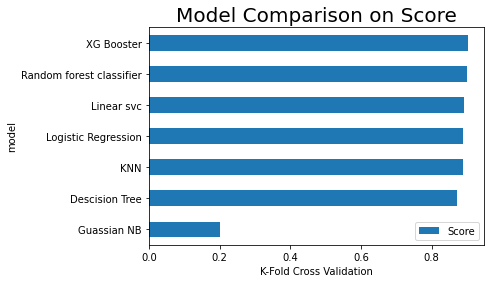

In [24]:
model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Descision Tree','XG Booster'],'Score':score})

# horizontal bar  chart
model_comparison.sort_values('Score',ascending=True).plot(x = 'model', y = 'Score', kind = 'barh')
plt.xlabel('K-Fold Cross Validation')
plt.title('Model Comparison on Score', size = 20);
plt.show()

In [25]:
# Model selected:xg booster
from xgboost import XGBClassifier
clf = XGBClassifier(random_state = 96)
clf.fit(X_train,y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
acc_log_reg

90.5

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print(accuracy_score(y_test,Y_pred))

[[5700  135]
 [ 530  225]]
0.8990895295902883


In [27]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      5835
         1.0       0.62      0.30      0.40       755

    accuracy                           0.90      6590
   macro avg       0.77      0.64      0.67      6590
weighted avg       0.88      0.90      0.88      6590

